In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

In [3]:
n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
shifted_gaussian[:5]

array([[ 21.76405235,  20.40015721],
       [ 20.97873798,  22.2408932 ],
       [ 21.86755799,  19.02272212],
       [ 20.95008842,  19.84864279],
       [ 19.89678115,  20.4105985 ]])

In [4]:
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
stretched_gaussian[:5]

array([[ 1.46061587,  1.37742372],
       [ 0.83336102,  0.82773015],
       [-2.06520176,  0.57113369],
       [-5.81244934, -1.08514728],
       [-1.32701647, -0.34600681]])

In [6]:
# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])
X_train.shape

(600, 2)

In [7]:
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [8]:
# display predicted scores by the model as a contour(轮廓、等高线) plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T

In [9]:
XX[:5]

array([[-20.        , -20.        ],
       [-18.97959184, -20.        ],
       [-17.95918367, -20.        ],
       [-16.93877551, -20.        ],
       [-15.91836735, -20.        ]])

In [16]:
XX.shape, x.shape, y.shape, X.shape, Y.shape

((2500, 2), (50,), (50,), (50, 50), (50, 50))

In [15]:
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)
Z.shape

(50, 50)

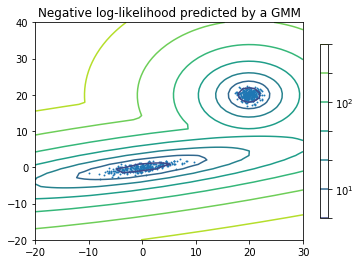

In [21]:
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()